**Medikal Maliyet Analizi**

---



Kullanılan data seti: https://www.kaggle.com/datasets/mirichoi0218/insurance

Projenin amacı, verilen değişkenlere göre bir kişinin sağlık sigortasının yaklaşık ne kadar masraflı olacagını tahmin etmektir.

In [44]:
#Kullanılacak kütüphanelerin eklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Datanın import edilmesi
df = pd.read_csv('insurance.csv')

In [46]:
#Eklenen orjinal datayı korumak için kopya oluşturduk bunun üzerinde çalışacağız
data = df.copy()

**Datanın incelenmesi**

In [47]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
data.shape 

(1338, 7)

In [49]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Bmi(Vücut Kitle İndeksi)’nin dağılımı**

In [52]:
data['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

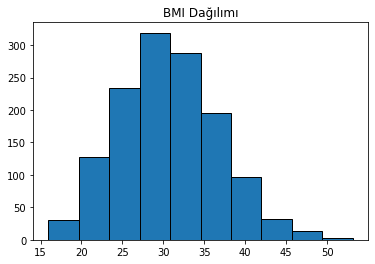

In [53]:
plt.hist(data['bmi'], edgecolor = 'black')
plt.title('BMI Dağılımı')
plt.show()

**“smoker” ile “charges” arasındaki ilişkiyi inceleyiniz**

Sigara içenlerin ortalama sigorta masrafı 32050.23183153284 iken sigara içmeyenlerin ortalama sigorta masrafı 8434.268297856204


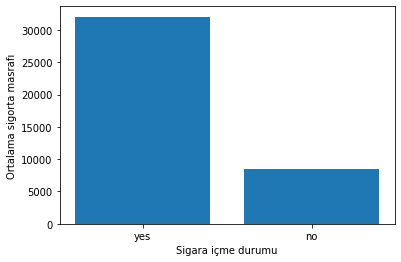

In [54]:
#Sigara içenler ile içmeyenlerin ödediği ortalama sigorta masrafına bakabiliriz

#Sigara içme durumu bar chartımızda x aksımız olacak
smoker_status = data['smoker'].unique()

#Sigara içme durumuna göre ortalama sigorta harcamalarını bulup bar chart da ekleyerek özetliyoruz
avg_charge_smoker_yes = data.loc[data['smoker'] == 'yes', 'charges'].mean()
avg_charge_smoker_no = data.loc[data['smoker'] == 'no', 'charges'].mean()

print(f'Sigara içenlerin ortalama sigorta masrafı {avg_charge_smoker_yes} iken sigara içmeyenlerin ortalama sigorta masrafı {avg_charge_smoker_no}')

y = np.array([avg_charge_smoker_yes, avg_charge_smoker_no])
plt.bar(smoker_status, y)
plt.xlabel('Sigara içme durumu')
plt.ylabel('Ortalama sigorta masrafı')
plt.show()

**“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.**

In [55]:
reg_smo = data.groupby(['region', 'smoker'])['smoker'].count()
reg_smo = reg_smo.to_frame()

reg_smo


smoker
region    smoker        
northeast no         257
          yes         67
northwest no         267
          yes         58
southeast no         273
          yes         91
southwest no         267
          yes         58

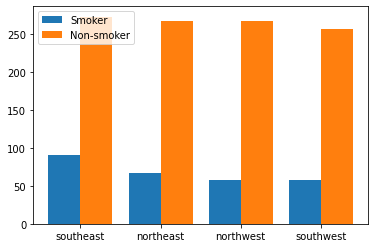

In [56]:
smoke_region = data[data['smoker'] == 'yes'].value_counts('region')
non_smoke_region = data[data['smoker'] == 'no'].value_counts('region')

regionlar = smoke_region.index
smoker = smoke_region.values
non_smoker = non_smoke_region.values

x_axis = np.arange(len(regionlar))

# Multi bar Chart

plt.bar(x_axis -0.2, smoker, width=0.4, label = 'Smoker')
plt.bar(x_axis +0.2, non_smoker, width=0.4, label = 'Non-smoker')

# Xticks

plt.xticks(x_axis, regionlar)

# Add legend

plt.legend()

# Display

plt.show()



**“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.**

In [57]:
#“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
avg_bmi_female = data.loc[data['sex'] == 'female', 'bmi'].mean()
avg_bmi_male = data.loc[data['sex'] == 'male', 'bmi'].mean()

print('Average BMI in females:', avg_bmi_female)
print('Average BMI in males:', avg_bmi_male)



Average BMI in females: 30.37774924471299
Average BMI in males: 30.943128698224854


**En çok “children”’a sahip “region”’ı bulunuz.**

In [58]:
#Bölge isimlerini tekilleştiriyoruz üzerinde iterasyon yapabilmek için.
regions = data['region'].unique()   

#Bölgedeki toplam çocuk sayısını hesaplayıp bölge ismi key, çocuk sayısı value olacak şekilde başta yaratmış olduğumuz dictionary'e yazıyoruz
reg_chl = {}
for region in regions:
  nbr_children = data.loc[data['region'] == region, 'children'].sum()
  reg_chl[region] = nbr_children

#Tüm bölgelerdeki toplam çocuk sayısını ve en fazla çocuğa sahip olan bölgeyi yazdırıyoruz
print('Bölgelere göre çocuk sayısı:', reg_chl)
print('En fazla çocuğa sahip olan bölge:', max(reg_chl, key=reg_chl.get))

Bölgelere göre çocuk sayısı: {'southwest': 371, 'southeast': 382, 'northwest': 373, 'northeast': 339}
En fazla çocuğa sahip olan bölge: southeast


**“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.**

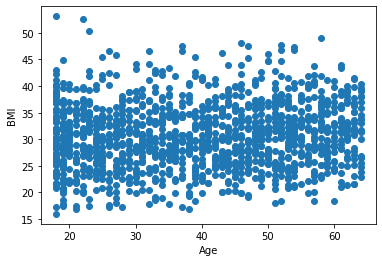

In [59]:
plt.scatter(x=data['age'], y=data['bmi'])

plt.xlabel('Age')
plt.ylabel('BMI')

plt.show()

**“bmi” ile “children” arasındaki ilişkiyi inceleyiniz.**

In [60]:
data.groupby('children')[['bmi']].mean()

,bmi
children,
0,30.550296
1,30.623148
2,30.978104
3,30.684331
4,31.391200
5,29.605000


**“bmi” değişkeninde outlier var mıdır? İnceleyiniz.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


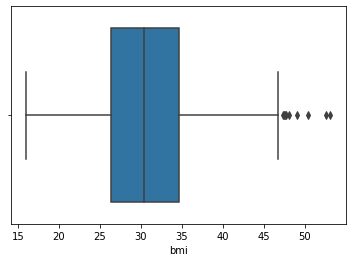

In [61]:
sns.boxplot(data['bmi']) 

#45'in üstündekiler outlier

**“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.**

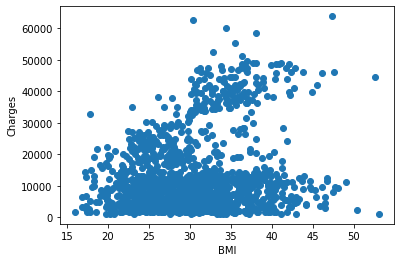

In [62]:
plt.scatter(x=data['bmi'], y=data['charges'])

plt.xlabel('BMI')
plt.ylabel('Charges')

plt.show()

**“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.**

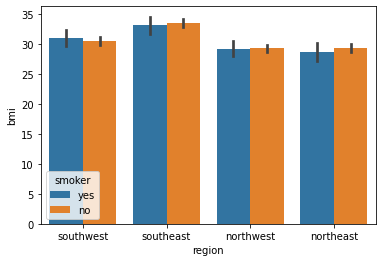

In [63]:
sns.barplot(data=data[["region", "smoker", "bmi"]], x = "region", y="bmi", hue="smoker");



**Veri Ön İşleme**

In [64]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
#'sex', 'smoker' ve 'region' kategorik değişkenlerimiz
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [66]:
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [67]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder()

In [68]:
feature_array = oh_encoder.fit_transform(df[['region']]).toarray()

In [69]:
feature_labels = oh_encoder.categories_

In [70]:
feature_labels = np.array(feature_labels).ravel()
print(feature_labels)

['northeast' 'northwest' 'southeast' 'southwest']


In [71]:
features = pd.DataFrame(feature_array, columns = feature_labels) 
features

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [72]:
data = pd.concat([data, features], axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [73]:
data = data.drop('region', axis = 1)
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [74]:
X = data.drop('charges', axis = 1)
y = data['charges']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [77]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (1070, 9)
X_test (268, 9)
y_train (1070,)
y_test (268,)


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Linear regression**

In [79]:
from sklearn.linear_model import LinearRegression


In [80]:
linear_model = LinearRegression()


In [81]:
linear_model.fit(X_train, y_train)


LinearRegression()

In [82]:
y_pred = linear_model.predict(X_test)


In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [85]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7516714410610958
MAE 		: 4053.7675130654156
MSE 		: 35850473.61152427
RMSE 		: 5987.52650194755


**Random forest regression**

In [86]:
from sklearn.ensemble import RandomForestRegressor


In [87]:
rf = RandomForestRegressor(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(rf.predict(X_test), y_test)
mse = mean_squared_error(rf.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 2502.91
Mean Squared Error (MSE): 17289565.38
Root Mean Squared Error (RMSE): 4158.07
